In [53]:
import pandas as pd

# Carregar o arquivo CSV
url = "https://raw.githubusercontent.com/icarocarmona/Tech-Challenges-DTAT-Grupo-26/main/F4-DATA-VIZ-PRODUCTION-MODELS/petroleo_bruto.csv"  # Substitua pelo URL do seu arquivo no Google Colab
df = pd.read_csv(url)

# Verificar as primeiras linhas do dataframe
print(df.head())

# Verificar informações sobre o dataframe
print(df.info())

# Estatísticas descritivas básicas
print(df.describe())

# Verificar se há valores nulos
print(df.isnull().sum())




         Data Preço - petróleo bruto - Brent (FOB)
0  22/04/2024                                87,30
1  19/04/2024                                87,96
2  18/04/2024                                88,34
3  17/04/2024                                89,54
4  16/04/2024                                91,29
<class 'pandas.core.frame.DataFrame'>
Index: 11156 entries, 0 to 11155
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Data                                  11155 non-null  object
 1   Preço - petróleo bruto - Brent (FOB)  11156 non-null  object
dtypes: object(2)
memory usage: 261.5+ KB
None
              Data Preço - petróleo bruto - Brent (FOB)
count        11155                                11156
unique       11155                                 5237
top     22/04/2024                                18,48
freq             1                                   26


In [54]:
# Renomear a coluna
df = df.rename(columns={'Preço - petróleo bruto - Brent (FOB)': 'Preço'})

print(df.head())


         Data  Preço
0  22/04/2024  87,30
1  19/04/2024  87,96
2  18/04/2024  88,34
3  17/04/2024  89,54
4  16/04/2024  91,29


Exemplos de eventos que podem ter impactado o preço do petróleo:

**Crises geopolíticas:** Guerras, conflitos, sanções comerciais em regiões produtoras de petróleo podem afetar a oferta e demanda global.

**Instabilidade política em países produtores:** Mudanças de governo, instabilidade política ou problemas de segurança podem afetar a produção e exportação de petróleo.

**Economia global:** Crises econômicas, recessões ou períodos de crescimento econômico robusto podem influenciar a demanda por petróleo.

**Decisões da OPEP:** Acordos de produção da OPEP (Organização dos Países Exportadores de Petróleo) podem ter um grande impacto no mercado global de petróleo.

In [56]:
# Converter a coluna de datas para o tipo datetime
df['Data'] = pd.to_datetime(df['Data'])

<ipython-input-56-fdd930ffa4ae>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Data'] = pd.to_datetime(df['Data'])


In [59]:
import re

# Definir uma expressão regular para encontrar todos os caracteres não numéricos, exceto pontos e vírgulas
non_numeric_pattern = r'[^\d.,]'

# Substituir todos os caracteres não numéricos por espaços em branco
df['Preço'] = df['Preço'].str.replace(non_numeric_pattern, '', regex=True)

# Substituir vírgulas por pontos para garantir que o formato numérico seja consistente
df['Preço'] = df['Preço'].str.replace(',', '.')

# Converter a coluna 'Preço' para tipo numérico
df['Preço'] = pd.to_numeric(df['Preço'], errors='coerce')

# Verificar o tipo de dados após a conversão
print(df.dtypes)



Data     datetime64[ns]
Preço           float64
dtype: object


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11156 entries, 0 to 11155
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    11155 non-null  datetime64[ns]
 1   Preço   11155 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 261.5 KB


In [61]:
df.head()

,Data,Preço
0,2024-04-22,87.30
1,2024-04-19,87.96
2,2024-04-18,88.34
3,2024-04-17,89.54
4,2024-04-16,91.29


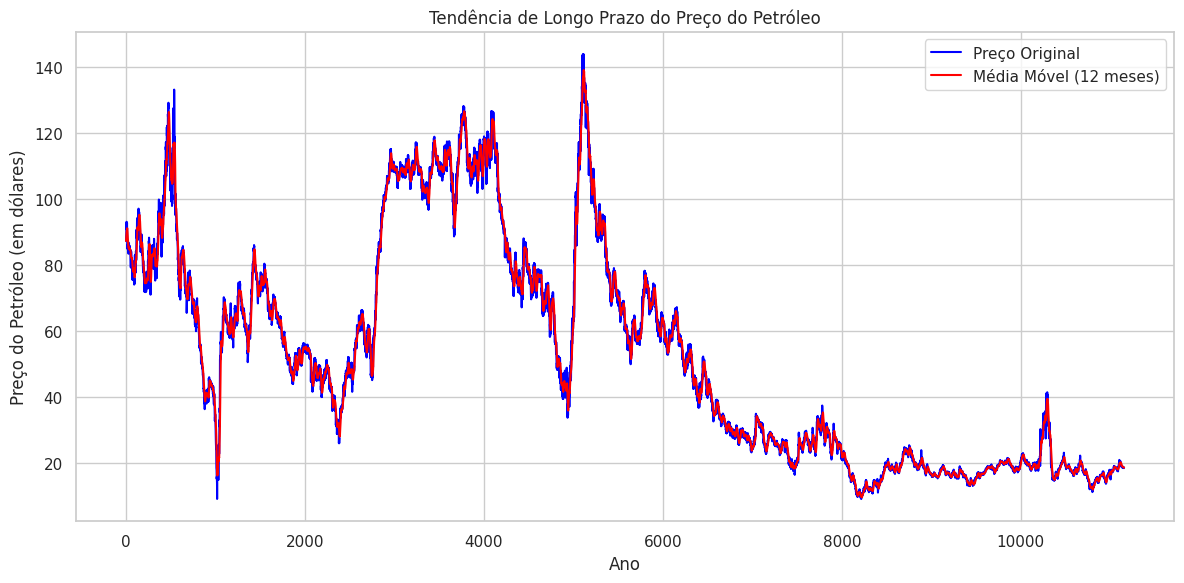

In [62]:
import numpy as np

# Substituir valores não numéricos na coluna 'Preço' por NaN
df['Preço'] = pd.to_numeric(df['Preço'], errors='coerce')

# Calcular a média móvel
window_size = 12
df['Média Móvel'] = df['Preço'].rolling(window=window_size, min_periods=1).mean()

# Plotar os dados originais e a média móvel
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Preço'], label='Preço Original', color='blue')
plt.plot(df.index, df['Média Móvel'], label=f'Média Móvel ({window_size} meses)', color='red')
plt.title('Tendência de Longo Prazo do Preço do Petróleo')
plt.xlabel('Ano')
plt.ylabel('Preço do Petróleo (em dólares)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
